### 处理缺失数据

In [1]:
import pandas as pd
from io import StringIO#字符型读入
import numpy as np

In [2]:
csv_data='''A,B,C,D
1,2,3,4
5,6,,8
10,11,12,'''
csv_data=pd.read_csv(StringIO(csv_data))
csv_data

,A,B,C,D
0,1,2,3.0,4.0
1,5,6,NaN,8.0
2,10,11,12.0,NaN


In [3]:
csv_data.isnull().sum()#查看缺失数据

A    0
B    0
C    1
D    1
dtype: int64

In [7]:
#删除缺失数据
csv_data.dropna(axis=1)
csv_data.dropna(how='all')
csv_data.dropna(thresh=4)
csv_data.dropna(subset=['C'])

,A,B,C,D
0,1,2,3.0,4.0
2,10,11,12.0,NaN


### 填补缺失数据

In [13]:
#from sklearn.preprocessing import Imputer 新版不能用了
from sklearn import impute#里面有三种插补方式

In [16]:
imr=impute.SimpleImputer(missing_values=np.NaN,strategy='mean')
imr.fit(csv_data.values)#训练数据
impute_data=imr.transform(csv_data.values)#测试数据
impute_data

array([[ 1. ,  2. ,  3. ,  4. ],
       [ 5. ,  6. ,  7.5,  8. ],
       [10. , 11. , 12. ,  6. ]])

In [17]:
csv_data

,A,B,C,D
0,1,2,3.0,4.0
1,5,6,NaN,8.0
2,10,11,12.0,NaN


### 处理分类数据

In [46]:
df = pd.DataFrame([['green', 'M', 10.1, 'class2'],
                   ['red', 'L', 13.5, 'class1'],
                   ['blue', 'XL', 15.3, 'class2']])

df.columns = ['color', 'size', 'price', 'classlabel']
df

,color,size,price,classlabel
0,green,M,10.1,class2
1,red,L,13.5,class1
2,blue,XL,15.3,class2


In [61]:
#有序的映射
size_mapping={"M":1,"L":2,"XL":3}
df.size=df['size'].map(size_mapping)
df

,color,size,price,classlabel
0,green,1,10.1,class2
1,red,2,13.5,class1
2,blue,3,15.3,class2


In [60]:
#反映射回去
inv_size_mapping={v:k for k,v in size_mapping.items() }
df.siez=df['size'].map(inv_size_mapping)
df

<ipython-input-60-2c1cb0dc9669>:3: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  df.siez=df['size'].map(inv_size_mapping)


,color,size,price,classlabel
0,green,M,10.1,class2
1,red,L,13.5,class1
2,blue,XL,15.3,class2


In [41]:
class_mapping={v:k for k,v in enumerate(sorted(df.classlabel.unique()))}
class_mapping

{'class1': 0, 'class2': 1}

In [47]:
df['classlabel'].map(class_mapping)

0    1
1    0
2    1
Name: classlabel, dtype: int64

In [50]:
#用sklearn里面的现成方法
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
y=le.fit_transform(df.classlabel.values)
y

array([1, 0, 1])

In [51]:
le.inverse_transform(y)#反映射回去

array(['class2', 'class1', 'class2'], dtype=object)

### 为名词特征做独热编码

In [80]:
X = df[['color', 'size', 'price']].values
color_le = LabelEncoder()
X[:, 0] = color_le.fit_transform(X[:, 0])
X

array([[1, 1, 10.1],
       [2, 2, 13.5],
       [0, 3, 15.3]], dtype=object)

In [116]:
#用颜色作为特征的时候，不能将其变为0，1，2，因为没有大小之分，应该生成三分虚拟变量
from sklearn.preprocessing import OneHotEncoder
X = df['color'].values.reshape(-1,1)
ohe = OneHotEncoder()
pd.DataFrame(ohe.fit_transform(X).toarray())

,0,1,2
0,0.0,1.0,0.0
1,0.0,0.0,1.0
2,1.0,0.0,0.0


In [122]:
#用pandas
pd.get_dummies(df[['color', 'size', 'price']],drop_first=True)#变量的个数少于分类的个数，要不然会出现多重共线性

,size,price,color_green,color_red
0,1,10.1,1,0
1,2,13.5,0,1
2,3,15.3,0,0


### 分数据集为测试数据集和训练数据集

In [4]:
#获取白酒数据
df_wine = pd.read_csv('https://archive.ics.uci.edu/'
                      'ml/machine-learning-databases/wine/wine.data',
                      header=None)

In [5]:
df_wine.columns = ['Class label', 'Alcohol', 'Malic acid', 'Ash',
                   'Alcalinity of ash', 'Magnesium', 'Total phenols',
                   'Flavanoids', 'Nonflavanoid phenols', 'Proanthocyanins',
                   'Color intensity', 'Hue', 'OD280/OD315 of diluted wines',
                   'Proline']

print('Class labels', np.unique(df_wine['Class label']))
df_wine.head()

Class labels [1 2 3]


,Class label,Alcohol,Malic acid,Ash,Alcalinity of ash,Magnesium,Total phenols,Flavanoids,Nonflavanoid phenols,Proanthocyanins,Color intensity,Hue,OD280/OD315 of diluted wines,Proline
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735


In [6]:
from sklearn.model_selection import train_test_split
X, y = df_wine.iloc[:, 1:].values, df_wine.iloc[:, 0].values

X_train, X_test, y_train, y_test =    train_test_split(X, y, 
                     test_size=0.3, 
                     random_state=0, 
                     stratify=y)#保证y是相同的比例分配的

### 把特征保持在同一层次

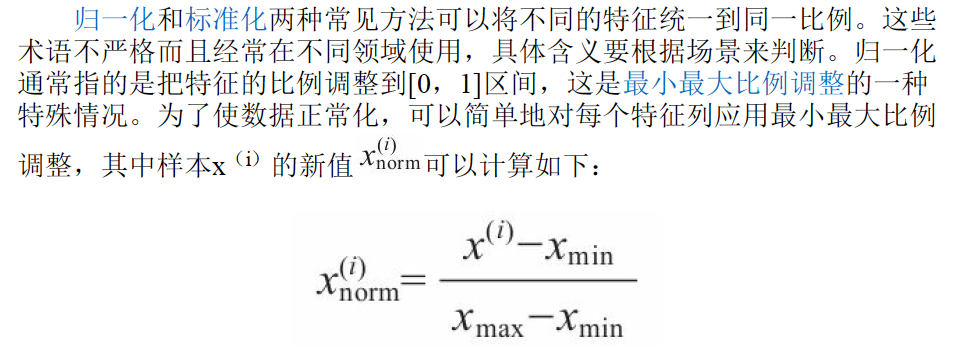
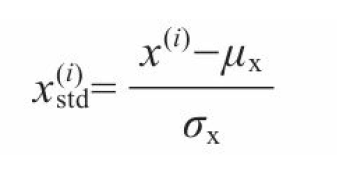

In [7]:
from sklearn.preprocessing import MinMaxScaler,StandardScaler
#归一化
mms = MinMaxScaler()
X_train_norm = mms.fit_transform(X_train)
X_test_norm = mms.transform(X_test)
#标准化
stdsc = StandardScaler()
X_train_std = stdsc.fit_transform(X_train)
X_test_std = stdsc.transform(X_test)

### 选择有意义的特征

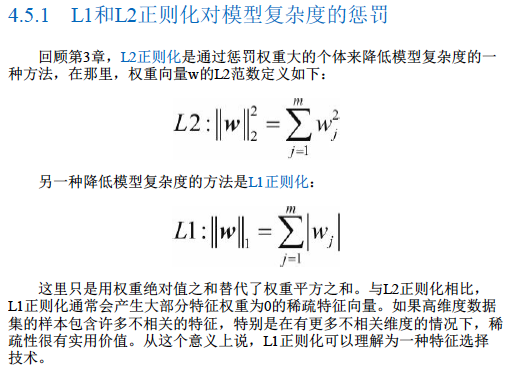
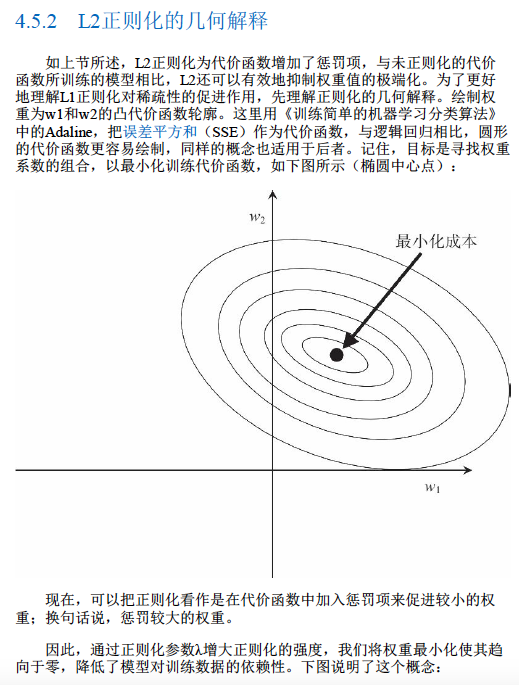
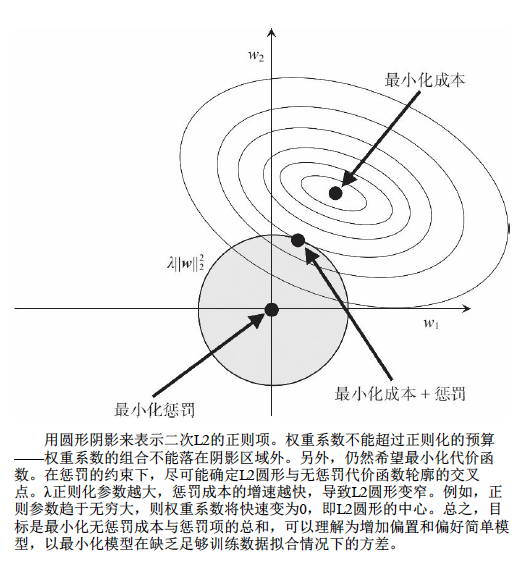
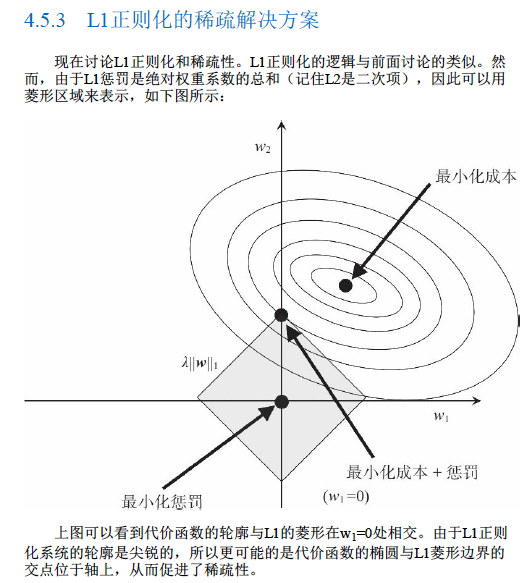

In [8]:
#使用L1正则化
from sklearn.linear_model import LogisticRegression
lr=LogisticRegression(penalty='l1',C=1,solver='liblinear')#l1正则化，训练了数据集中潜在的不相关特征处理能力强的的模型
lr.fit(X_train_std,y_train)
print(lr.score(X_train_std,y_train))
print(lr.score(X_test_std,y_test))

1.0
1.0


In [9]:
print(lr.intercept_)#截距
print(lr.coef_)#系数

[-1.26362939 -1.21578617 -2.37031254]
[[ 1.24570993  0.18045503  0.74506503 -1.16272555  0.          0.
   1.16479685  0.          0.          0.          0.          0.55266
   2.50974101]
 [-1.53690816 -0.38763048 -0.99503878  0.36490736 -0.05990602  0.
   0.66763245  0.          0.         -1.93426213  1.23385524  0.
  -2.23094862]
 [ 0.13564413  0.1685841   0.35730316  0.          0.          0.
  -2.43716009  0.          0.          1.56342787 -0.81878477 -0.49294156
   0.        ]]


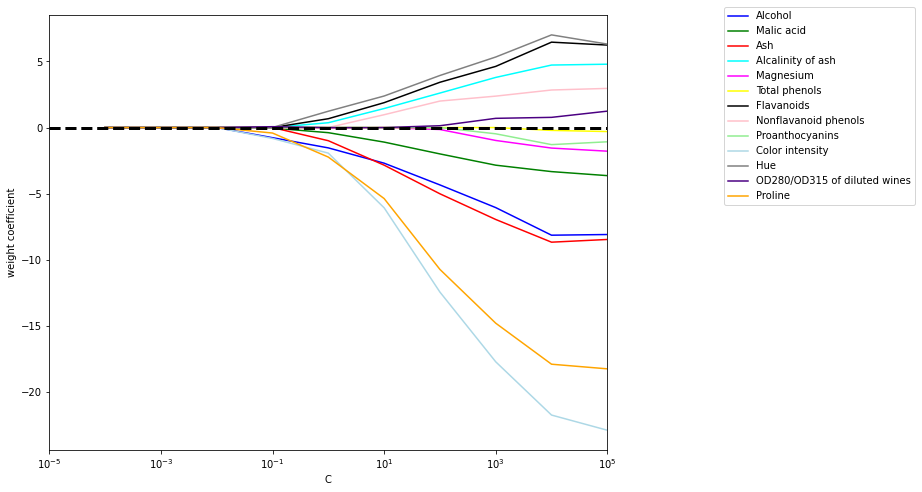

In [10]:
#l1正则化下强度C和权重系数的关系
import matplotlib.pyplot as plt
fig = plt.figure(figsize=(10,8))
ax = plt.subplot(111)
    
colors = ['blue', 'green', 'red', 'cyan', 
          'magenta', 'yellow', 'black', 
          'pink', 'lightgreen', 'lightblue', 
          'gray', 'indigo', 'orange']

weights, params = [], []
for c in np.arange(-4., 6.):
    lr = LogisticRegression(penalty='l1', C=10.**c,solver='liblinear', random_state=0)
    lr.fit(X_train_std, y_train)
    weights.append(lr.coef_[1])
    params.append(10**c)

weights = np.array(weights)

for column, color in zip(range(weights.shape[1]), colors):
    plt.plot(params, weights[:, column],
             label=df_wine.columns[column + 1],
             color=color)
plt.axhline(0, color='black', linestyle='--', linewidth=3)
plt.xlim([10**(-5), 10**5])
plt.ylabel('weight coefficient')
plt.xlabel('C')
plt.xscale('log')
plt.legend(loc='upper left')
ax.legend(loc='upper center', 
          bbox_to_anchor=(1.38, 1.03),
          ncol=1, fancybox=True)
#plt.savefig('images/04_07.png', dpi=300, 
#            bbox_inches='tight', pad_inches=0.2)
plt.show()

#### 随着C越小，正则化强度越大，C越大正则化强度越小，权重系数越大

### 特征选择和特征提取

#### SBS：逆顺序选择方法。类似于向后逐步回归，每次剔除一个特征变量，剔除的是预测效果最差的那个，直到特征数量达到要求的数量

In [11]:
from sklearn.base import clone
from sklearn.metrics import accuracy_score
from itertools import combinations
from sklearn.neighbors import KNeighborsClassifier
class SBS():
    def __init__(self, estimator, k_features, scoring=accuracy_score,
                 test_size=0.25, random_state=1):
        self.scoring = scoring
        self.estimator = clone(estimator)
        self.k_features = k_features
        self.test_size = test_size
        self.random_state = random_state

    def fit(self, X, y):

        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=self.test_size,
                                                            random_state=self.random_state)

        dim = X_train.shape[1]
        self.indices_ = tuple(range(dim))#元组，包含所有的维度
        self.subsets_ = [self.indices_]#变成列表，方便提取X中的几个特征
        score = self._calc_score(X_train, y_train,
                                 X_test, y_test, self.indices_)##计算总的准确度
        self.scores_ = [score]

        while dim > self.k_features:
            scores = []
            subsets = []

            for p in combinations(self.indices_, r=dim - 1):#取r维的排列组合
                score = self._calc_score(X_train, y_train,
                                         X_test, y_test, p)#计算少一个的准确度,所有组合
                scores.append(score)#所有组合的准确率
                subsets.append(p)#所有的组合的X的特征索引

            best = np.argmax(scores)#最大的准确率的索引
            self.indices_ = subsets[best]#最大准确率下的特征索引
            self.subsets_.append(self.indices_)
            dim -= 1

            self.scores_.append(scores[best])#所有的的最高准确率
        self.k_score_ = self.scores_[-1]#当下的准确率

        return self

    def transform(self, X):
        return X[:, self.indices_]

    def _calc_score(self, X_train, y_train, X_test, y_test, indices):
        self.estimator.fit(X_train[:, indices], y_train)
        y_pred = self.estimator.predict(X_test[:, indices])
        score = self.scoring(y_test, y_pred)
        return score

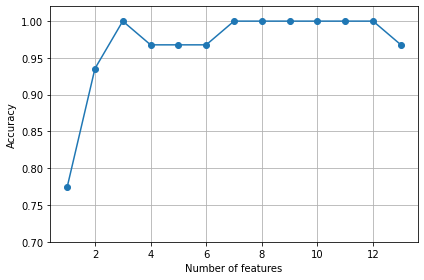

In [12]:
knn = KNeighborsClassifier(n_neighbors=5)

# selecting features
sbs = SBS(knn, k_features=1)
sbs.fit(X_train_std, y_train)

# plotting performance of feature subsets
k_feat = [len(k) for k in sbs.subsets_]

plt.plot(k_feat, sbs.scores_, marker='o')
plt.ylim([0.7, 1.02])
plt.ylabel('Accuracy')
plt.xlabel('Number of features')
plt.grid()
plt.tight_layout()
# plt.savefig('images/04_08.png', dpi=300)
plt.show()

In [41]:
k3=list(sbs.subsets_[10])#最小特征数量的变量
print(df_wine.columns[1:][k3])

Index(['Alcohol', 'Malic acid', 'OD280/OD315 of diluted wines'], dtype='object')


In [45]:
knn.fit(X_train_std,y_train)
print(knn.score(X_train_std,y_train))
print(knn.score(X_test_std,y_test))

0.967741935483871
0.9629629629629629


In [47]:
#选用三个特征
knn.fit(X_train_std[:,k3],y_train)
print(knn.score(X_train_std[:,k3],y_train))
print(knn.score(X_test_std[:,k3],y_test))

0.9516129032258065
0.9259259259259259


### 随机森林提取特征

In [53]:
from sklearn.ensemble import RandomForestClassifier
forest=RandomForestClassifier(random_state=1,n_estimators=500)
feat_labels=df_wine.columns[1:]

In [54]:
forest.fit(X_train,y_train)
importances=forest.feature_importances_

In [56]:
importances

array([0.11852942, 0.02564836, 0.01327854, 0.02236594, 0.03135708,
       0.05087243, 0.17475098, 0.01335393, 0.02556988, 0.1439199 ,
       0.058739  , 0.13616194, 0.1854526 ])

 1) Proline                        0.185453
 2) Flavanoids                     0.174751
 3) Color intensity                0.143920
 4) OD280/OD315 of diluted wines   0.136162
 5) Alcohol                        0.118529
 6) Hue                            0.058739
 7) Total phenols                  0.050872
 8) Magnesium                      0.031357
 9) Malic acid                     0.025648
10) Proanthocyanins                0.025570
11) Alcalinity of ash              0.022366
12) Nonflavanoid phenols           0.013354
13) Ash                            0.013279


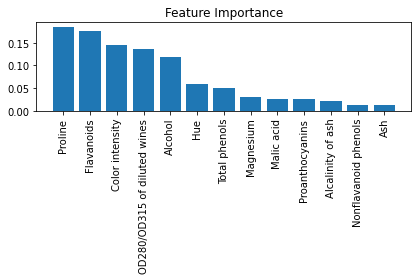

In [55]:
indices = np.argsort(importances)[::-1]

for f in range(X_train.shape[1]):
    print("%2d) %-*s %f" % (f + 1, 30, 
                            feat_labels[indices[f]], 
                            importances[indices[f]]))
plt.title('Feature Importance')
plt.bar(range(X_train.shape[1]), 
        importances[indices],
        align='center')

plt.xticks(range(X_train.shape[1]), 
           feat_labels[indices], rotation=90)
plt.xlim([-1, X_train.shape[1]])
plt.tight_layout()
#plt.savefig('images/04_09.png', dpi=300)
plt.show()

In [61]:
#使用sklearn中的现成的特征选择
from sklearn.feature_selection import SelectFromModel
sfm=SelectFromModel(forest,threshold=0.1,prefit=True)

In [68]:
X_select=sfm.transform(X_train)
for f in range(X_select.shape[1]):
    print(f)
    print("%2d) %-*s %f" % (f + 1, 30, 
                            feat_labels[indices[f]], 
                            importances[indices[f]]))

0
 1) Proline                        0.185453
1
 2) Flavanoids                     0.174751
2
 3) Color intensity                0.143920
3
 4) OD280/OD315 of diluted wines   0.136162
4
 5) Alcohol                        0.118529


### 本章从寻找能确保正确地处理缺失数据的有用技术开始。在将数据输入机器学习算法之前，必须确保对分类变量进行正确的编码，并且已经看到了如何将序数特征和名词特征值映射成整数来表示。此外，简要地介绍了L1正则化，它可以通过降低模型的复杂性来避免过拟合。用序数特征选择算法从数据集中选择有意义的特征以去除不相关的特征。